# 进行图像预处理

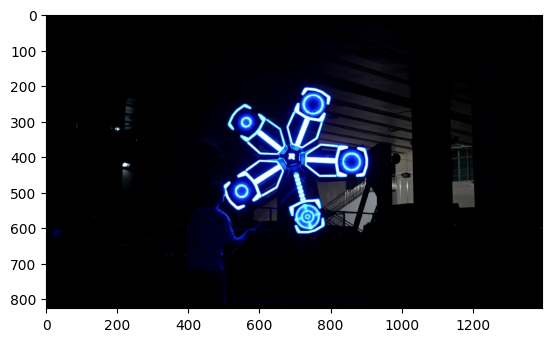

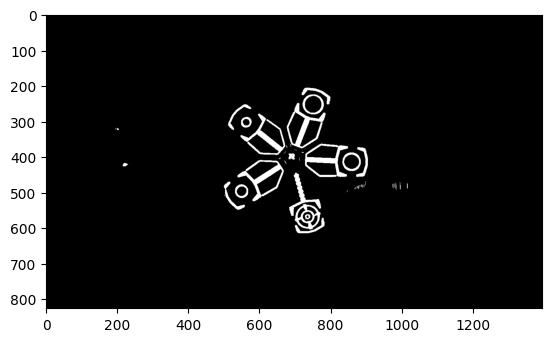

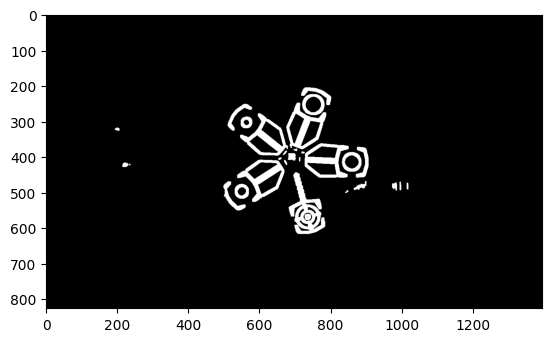

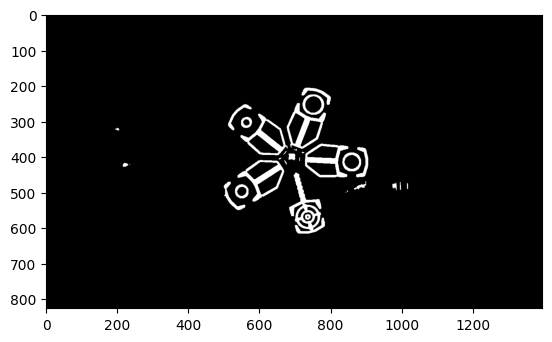

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 导入图像(im)
#im = cv.imread('./blue.png')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
#使用高斯模糊过滤噪点,展示过滤后的图像 
#im = cv.GaussianBlur(im,(3,3),0)
plt.imshow(im)
plt.show()

#以灰度图(img)读写
img = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

#调整灰度阈值,并显示
ret, thresh = cv.threshold(img,200,255,cv.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.show()

#扩张并显示
kernel = np.ones((4, 4), np.uint8)
dilation = cv.dilate(thresh, kernel, iterations=1)
plt.imshow(dilation,cmap='gray')
plt.show()

#扩张后调整灰度阈值
ret, dilation = cv.threshold(dilation,245,255,cv.THRESH_BINARY)

#侵蚀并显示
kernel_ = np.ones((3, 3), np.uint8)
erosion=cv.erode(dilation,kernel_,iterations=1)
plt.imshow(erosion,cmap='gray')
plt.show()

# 寻找目标轮廓

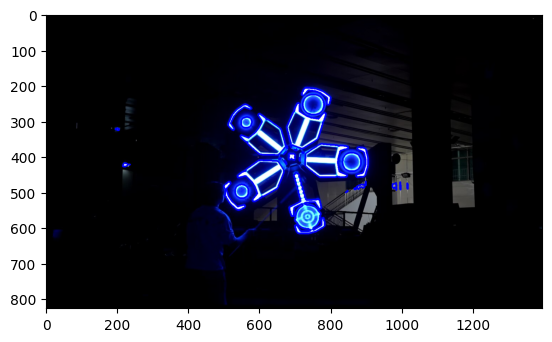

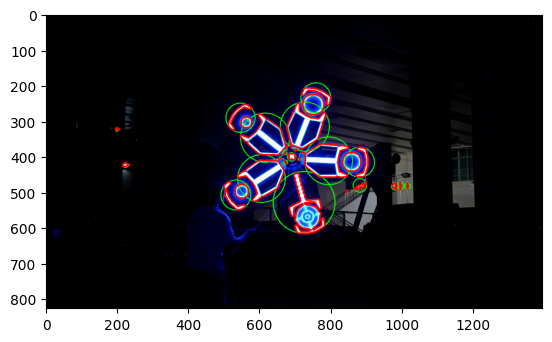

In [34]:
#调用函数寻找预处理后的轮廓
contours, hierarchy = cv.findContours(erosion, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #建立外轮廓
cv.drawContours(im,contours,-1,(0,0,255),3)
plt.imshow(im)
plt.show()


#拟合圆
#for cnt in contours:
 #   (x,y),radius = cv.minEnclosingCircle(cnt)
  #  center = (int(x),int(y))
   # radius = int(radius)
    #cv.circle(im,center,radius,(0,255,0),2)

#拟合矩形
for cnt in contours:
    x,y,w,h = cv.boundingRect(cnt)
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


#在im图上显示轮廓
cv.drawContours(im,contours,-1,(255,0,0),3)
plt.imshow(im)
plt.show()

#尝试用RBG寻找目标
